# Задание:
1. Постройте дерево решений минимальной высоты, которое дает точные предсказания исхода игры для различных условий.
2. В качестве ответа приложите файл содержащий структуру дерева.
3. В текстовое поле напишите высоту дерева и исход игры для указанных условий.

In [53]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [43]:
df = pd.read_excel("resources/train_set_2.xlsx", index_col="Номер ")
df

,Соперник,Где играем,Лидеры,Дождь,Победа
Номер,,,,,
G1,Выше,Дома,На месте,Да,Нет
G2,Выше,Дома,На месте,Нет,Да
G3,Выше,Дома,Пропускают,Нет,Да
G4,Ниже,Дома,Пропускают,Нет,Да
G5,Ниже,В гостях,Пропускают,Нет,Нет
G6,Ниже,Дома,Пропускают,Да,Да
G7,Выше,В гостях,На месте,Да,Нет
G8,Ниже,В гостях,На месте,Нет,???


In [48]:
features_names = ['Соперник', 'Где играем', 'Лидеры', 'Дождь']
target_name = ['Победа']
class_names=['Нет', 'Да']

In [60]:
le = LabelEncoder()


X_train = df.iloc[:-1][features_names].apply(le.fit_transform)
X_test = df.iloc[-1:][features_names].apply(le.fit_transform)
y_train = le.fit_transform(df.iloc[:-1]['Победа'])
print("--------------------X_train-----------------")
print(X_train)
print("--------------------y_train-----------------")
print(y_train)
print("--------------------X_test------------------")
print(X_test)
print("--------------------------------------------")

--------------------X_train-----------------
        Соперник  Где играем  Лидеры  Дождь
Номер                                      
G1             0           1       0      0
G2             0           1       0      1
G3             0           1       1      1
G4             1           1       1      1
G5             1           0       1      1
G6             1           1       1      0
G7             0           0       0      0
--------------------y_train-----------------
[1 0 0 0 1 0 1]
--------------------X_test------------------
        Соперник  Где играем  Лидеры  Дождь
Номер                                      
G8             0           0       0      0
--------------------------------------------


[1]
[1]
[1]
[1]


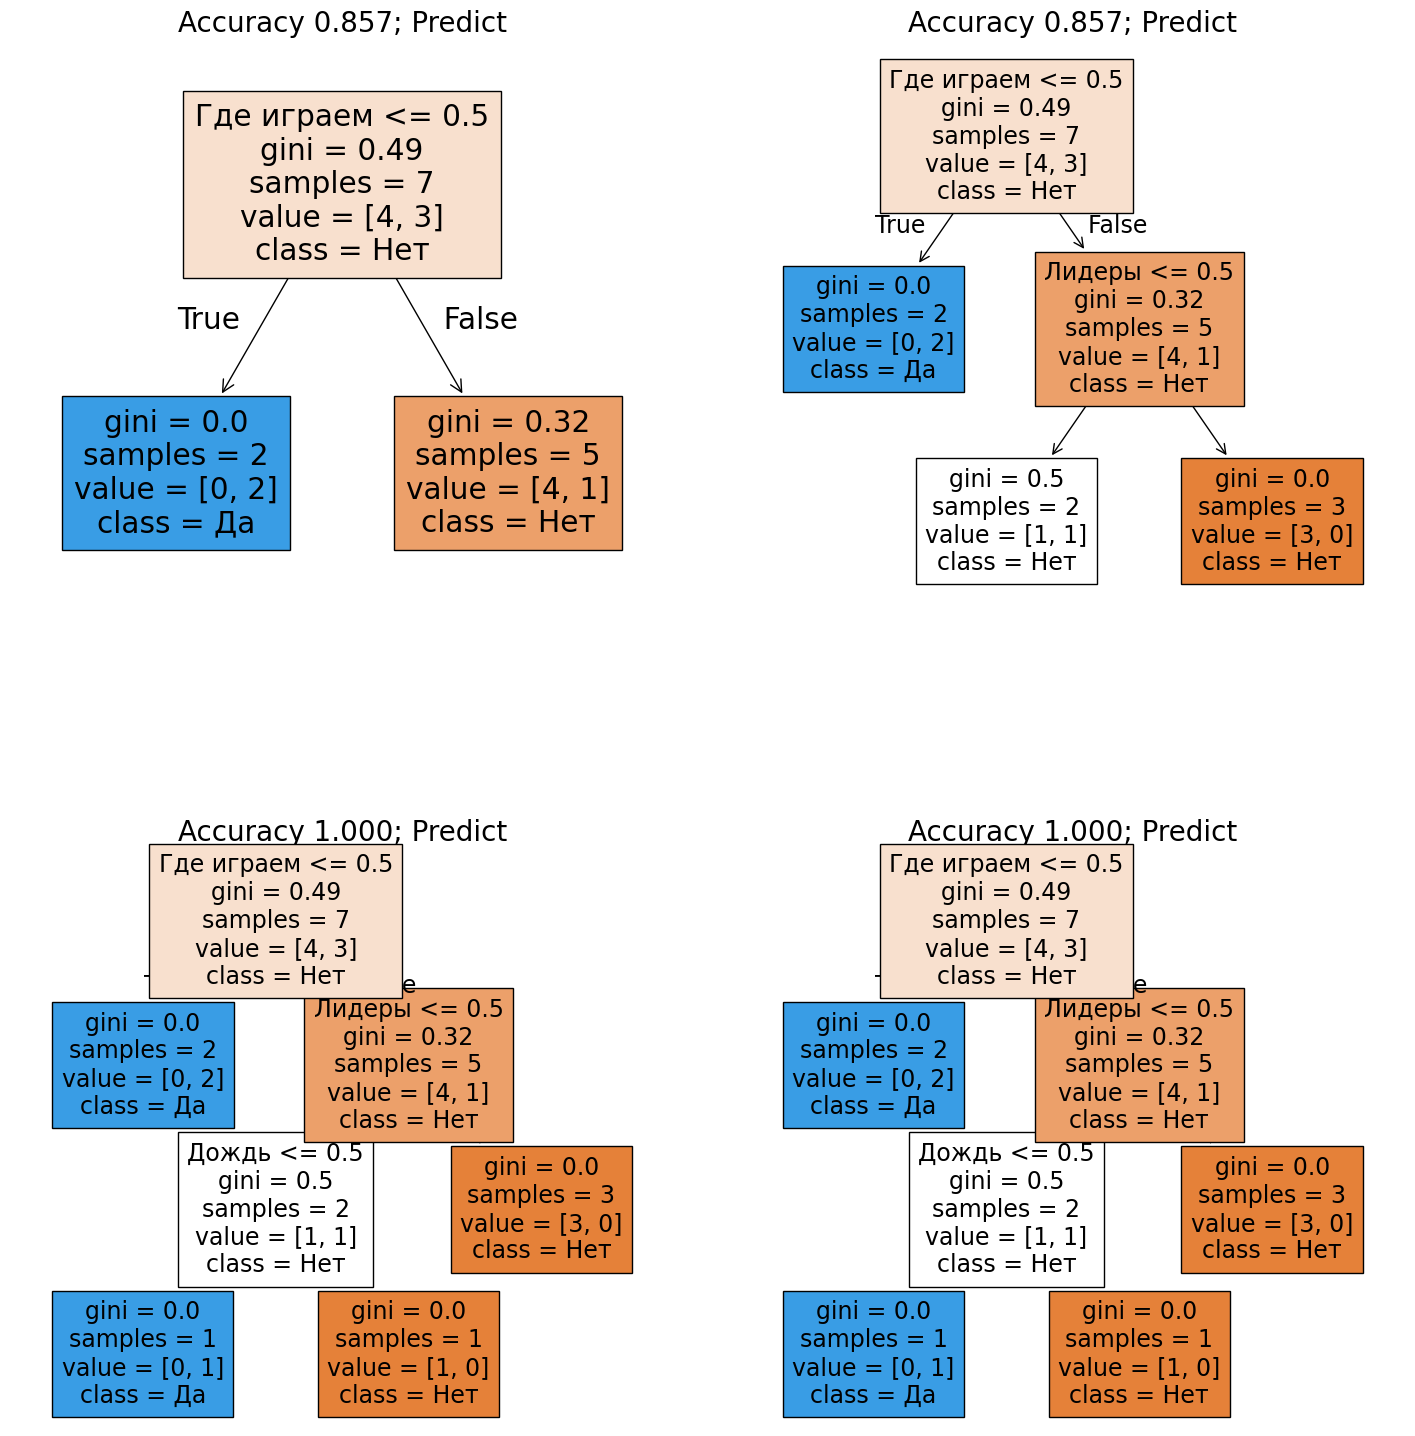

In [61]:
depth = [1, 2, 3, 4]
pic = 1
plt.figure(figsize=(18,18))

for dep in depth:
    ax = plt.subplot(2, 2, pic)
    clf = DecisionTreeClassifier(max_depth = dep,  criterion = 'gini', random_state = 12345)
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_train)
    clf_acc = accuracy_score(y_train, clf_pred)
    plot_tree(clf, feature_names = features_names, class_names=class_names, filled = True)
    ax.set_title("Accuracy %.3f; Predict" % ( clf_acc), fontsize=20)
    print(clf.predict(X_test))
    pic+=1

plt.subplots_adjust(wspace=0.1, hspace=0.4)
